In [6]:
from transformers import AutoTokenizer
from pprint import pprint

In [ ]:
#Util function to separate the different prints
def sep():
    print("-"*138)

The tokenizers allows to tokenize the text , the class in the transformers lib is :   
- **Autokenizer**

We use it with a pretrained model (in general) , with can do it with the method:  
- **Autotokenizer.from_pretrained()**

# 1) Tokenization pipeline architecture
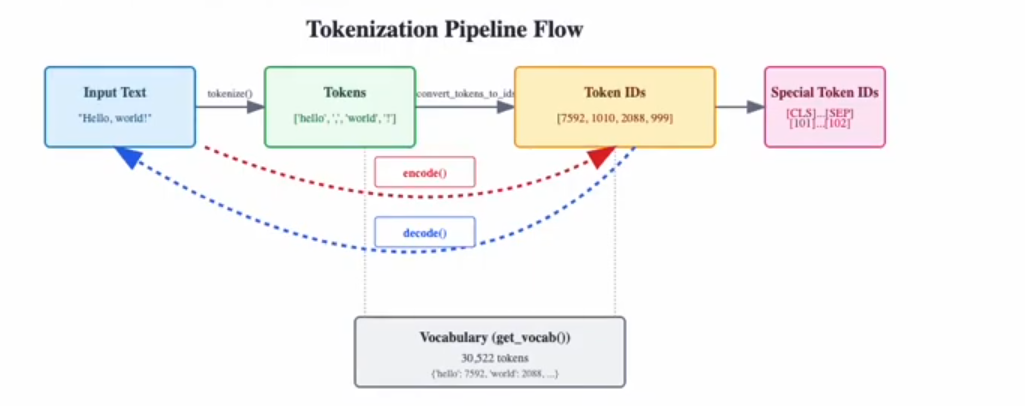

In [ ]:
model = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

#Verify the tokenizer is loaded and print it's attributes
assert tokenizer is not None, "Tokenizer failed to load"
assert tokenizer.model_max_length == 512 , f"Excepted max tokens = 512 but the tokenizer got : {tokenizer.model_max_length} tokens"

print(f"Max len of the tokenizer : {tokenizer.model_max_length}")
print(f"Tokenizer vocab len is : {tokenizer.vocab_size}")
print(f"PAD token is :{tokenizer.pad_token} and it's id is {tokenizer.pad_token_id}")
print(f"UNK token is :{tokenizer.unk_token} and it's id is {tokenizer.unk_token_id}")

# 2) Basic Tokenization with `tokenize()`

The `tokenize()` method  convert text into a list of tokens . This is the first step in the tokenization pipeline

In [ ]:
text = "Hello World"
tokenized_word = tokenizer.tokenize(text)
print(f"Tokens are {tokenized_word}")


The `encode()` method transform each token into an id which is the corresponding id.  

In a classfication task that is accomplished by BERT , the first token is a *classification* token : *[CLS]* and the last token is a *separator* token: *[SEP]* which indicate the end of a sentance or is used to separate sentances

In [ ]:
text = "This course is so cool man !"
tokens_id = tokenizer.encode(text)
print(tokens_id)

classification_token = tokenizer.decode(tokens_id[0])
separator_token = tokenizer.decode(tokens_id[-1])
print(f'The first token is {classification_token} and the last one is {separator_token}')

# `encode()` method parameters
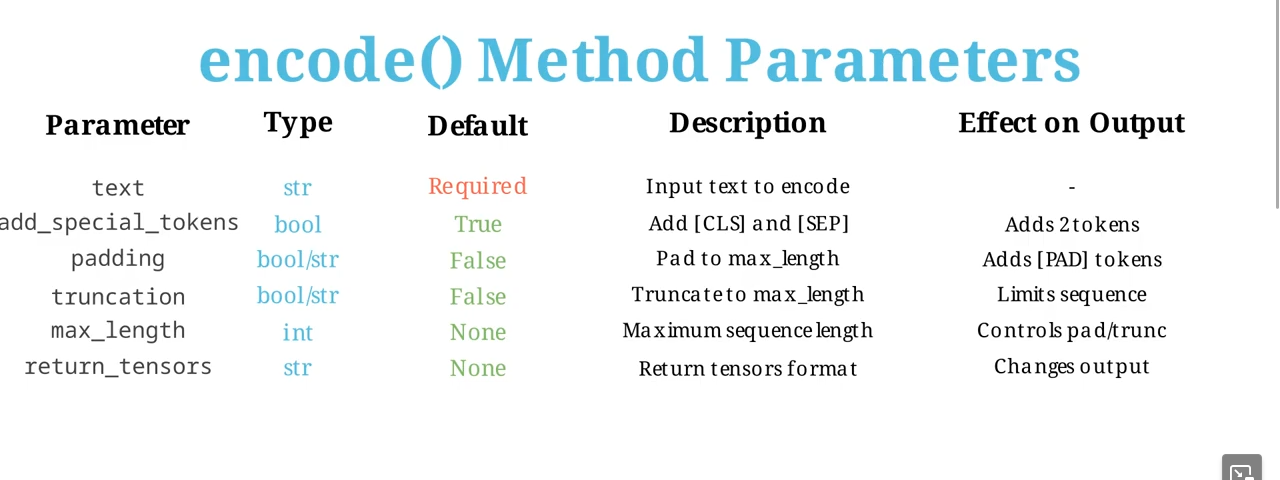

# 3) Explore the Vocabulary with `get_vocab()`  
The vocabulary is a dict that maps between tokens and their Ids . This is what is used by the `decode()` method.  


In [ ]:
vocab = tokenizer.get_vocab()
print(len(vocab))
 

We can also use the `encode_plus()` method that returns not only the tokens ids but also the *type* of the tokens and their *mask*.
The **mask** vector has two values :  
- 1 if it's a useful token for the transformer
- 0 if it's a PAD/CLS/SEP token  

The **mask** is used by the attention mechanism . In fact the multi-head attention layer has not to give to the PAD tokens attention.

In [ ]:
sentance_2 = 'Hello how are you man ?'
no_pad = tokenizer.encode_plus(sentance_2)
print(no_pad)
print('The ids are' , no_pad['input_ids'])
print("The token types are :",no_pad['token_type_ids'])
print("The attention mask is :",no_pad['attention_mask'])


Let's explore some params of the `encode()` method :  
- truncation: False| True
- padding: None | 'max_length'
- max_length : int | None

**PS: The max_len includes the CLS and SEP tokens**

In [ ]:
#Another util function to print the results
def printer(encoded):
    print('The ids are' , encoded['input_ids'])
    print("The token types are :",encoded['token_type_ids'])
    print("The attention mask is :",encoded['attention_mask'])
    print(f"We added : {encoded['input_ids'].count(tokenizer.pad_token_id)} PAD tokens ")

In [ ]:
s = "Hello dude"
s_encoded = tokenizer.encode_plus(s,max_length=10, padding= "max_length")
#Here is the example for the padding
printer(s_encoded)
sep()

#Here is the exemple for the truncation
s_long = "Hey man what are you doing today , you know it is a very sunny day "
s_long_encoded = tokenizer.encode_plus(s_long, truncation=True , max_length=10 , padding=True)
no_trunk = tokenizer.encode_plus(s_long, truncation=False, max_length=10, padding= True)


print(f'Without the truncation:\nThe ids are {no_trunk["input_ids"]}\nWith the truncation mode:')
printer(s_long_encoded)


# Batch encoding and processing multiple sequences

In reality we work with multiple texts so we use batches . The `batch_encoder_plus()` method is more efficient for this task than calling every time the `encoder_plus()` method for every sentance.  

In practice , we don't use the `encoder_plus()` method or another encoding method , instead , we just use the tokenizer as function where we can give all the parameters that we have seen above !



In [ ]:
text_batch = [
    "Hey man how are you today ?",
    "What's up buddy ",
    "This exercice is very hard , I don't know if I should enroll in ML courses"
]

batch_encoded = tokenizer(text_batch, padding=True )
printer(batch_encoded)
sep()
#We can also decode the encoded batch like what we have done a simple text
decoded_batch = tokenizer.batch_decode(batch_encoded['input_ids'], skip_special_tokens=True)
print('Here are the decoded sentances:')
for t in decoded_batch:
    print(t)

# Handling sentance Pairs

*Input pairs*:

- Sometimes we want the model to learn the link between two sentances (question-answering), so for that the model identifies each sentance with a *token_type_id* what will allows some models to better use it's weights (for example Bert has been trained with sentance pairs)

In [ ]:
s_1 = "The cat is on the sofa"
s_2 = "On the sofa you can see the animal layed off"

encoded_pair = tokenizer(s_1,s_2,padding='max_length', max_length=10)
pprint(encoded_pair)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101,
               1996,
               4937,
               2003,
               2006,
               1996,
               10682,
               102,
               2006,
               1996,
               10682,
               2017,
               2064,
               2156,
               1996,
               4111,
               3913,
               2098,
               2125,
               102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
